本文是bilibili：BV1PV411774y 的笔记

In [2]:
import cv2  #                                                                                  cv2.__version = 4.5.1
import matplotlib.pyplot as plt
import numpy as np
cv2.__version__
def imshow(img,name='Image1'):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#彻底解决中文路径问题
def imread(filename, mode=cv2.IMREAD_COLOR):
	raw_data = np.fromfile(filename, dtype=np.uint8)  #先用numpy把图片文件存入内存：raw_data，把图片数据看做是纯字节数据
	img = cv2.imdecode(raw_data, mode)  #从内存数据读入图片
	return img
def imwrite(filename,img):
    cv2.imencode('.jpg', img)[1].tofile(filename) 

In [6]:
#读取摄像头
template1 = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\template1.png')
template2 = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\template2.png')

a = template1.shape 
h1 = a[0]
w1 = a[1]

a = template2.shape 
h2 = a[0]
w2 = a[1]


import numpy as np
vc = cv2.VideoCapture(1)
vc.set(3,640)
vc.set(4,480)
if vc.isOpened():
    ret,frame = vc.read()
else:
    open = False
i = 0
while open:
    ret,frame = vc.read() 
    if frame is None:
        break
    if ret == True:
        img = frame  
        cv2.imshow('result',img)

    if cv2.waitKey(10) & 0xFF == 27: #  esc退出
        break
    if cv2.waitKey(10) & 0xFF == 13:
        i = i + 1
        cv2.imwrite('C:/MATLAB works/test/'+str(i)+'.jpg',img)
        print('img '+str(i)+' has been saved')
vc.release()

cv2.destroyAllWindows()


img 1 has been saved
img 2 has been saved
img 3 has been saved
img 4 has been saved
img 5 has been saved
img 6 has been saved
img 7 has been saved
img 8 has been saved
img 9 has been saved
img 10 has been saved
img 11 has been saved
img 12 has been saved
img 13 has been saved
img 14 has been saved
img 15 has been saved
img 16 has been saved
img 17 has been saved
img 18 has been saved
img 19 has been saved
img 20 has been saved


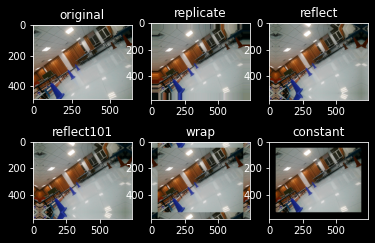

In [4]:
#边界填充
import cv2
img = cv2.imread('C:/MATLAB works/test/1.jpg')

top_size,bottom_size,left_size,right_size = (50,50,50,50)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT,value=0)

import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img,'gray'),plt.title('original')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('replicate')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('reflect')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('reflect101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('wrap')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('constant')
plt.show()


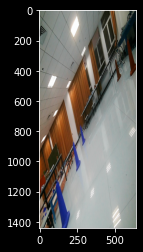

In [10]:
#像素值如果超过256不会报错，就只剩下超出部分了
cv2.add(img,img) #好方法
#mix-up
img1 = cv2.imread('C:/MATLAB works/test/1.jpg')
img2 = cv2.imread('C:/MATLAB works/test/2.jpg')
res = cv2.addWeighted(img1,0.4,img2,0.6,0)
plt.imshow(res)

#resize
img1_resize = cv2.resize(img1,(0,0),fx=1,fy=3)
img1_resize = cv2.resize(img1,(640,3*480))
plt.imshow(img1_resize)

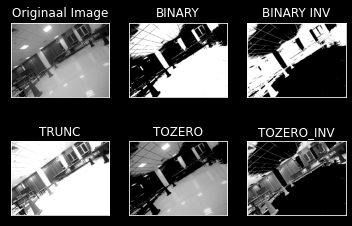

In [3]:
#图像阈值
import cv2
import matplotlib.pyplot as plt
#ret,dst = cv2.threshold(src,thresh,maxval,type)
img = cv2.imread('C:/MATLAB works/test/1.jpg',cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)#[0,127]是0，[127,256]是1。
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)#[0,127]是1，[127,256]是0。
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)#[0,127]不变，[127,256]变为127。
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)#[0,127]为0，[127,256]不变。
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Originaal Image','BINARY','BINARY INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(230+i+1),plt.imshow(images[i],'gray'),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [31]:
#图像平滑处理

#1，均值滤波
img = cv2.imread('C:/MATLAB works/test/1.jpg')
blur = cv2.blur(img,(20,20))
#imshow(blur)

#2,方框滤波,和均值滤波差不多，但是可以选择是否做归一化,这个可以把偏白色，亮的东西直接变成巨亮。
box = cv2.boxFilter(img,-1,(3,3),normalize=False)
#imshow(box)

#3，高斯滤波,不是平均，而是离得越近，影响越大。
gaussian = cv2.GaussianBlur(img,(5,5),1)
#imshow(gaussian)

#4，中值滤波,这个有效果的呀
median = cv2.medianBlur(img,5)
#imshow(median)

#展示所有图片的高级方法
res = np.hstack((blur,box,gaussian,median))
#imshow(res)

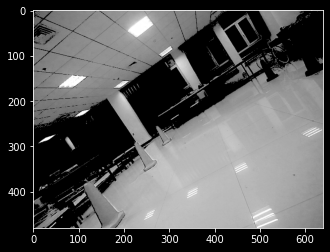

In [12]:
img = cv2.imread('C:/MATLAB works/test/1.jpg')
b,g,r = cv2.split(img)
ret,thresh = cv2.threshold(r,100,255,cv2.THRESH_TOZERO)
plt.imshow(thresh,'gray')

In [53]:
#腐蚀操作(对于二值数据进行腐蚀操作，去掉二值图像的毛刺,把线条变细)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
#imshow(erosion,'erosion')

#膨胀操作(突出有价值的信息，与腐蚀互为逆运算)
dige_dilate = cv2.dilate(erosion,kernel,iterations=1)
#imshow(dige_dilate)

In [55]:
#开运算(先腐蚀后膨胀)与闭运算(先膨胀后腐蚀)

#开运算
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
#imshow(opening)
#闭运算
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
#imshow(closing)

In [69]:
#梯度运算
#膨胀-腐蚀可以得到一个轮廓，就是我们所谓的梯度运算

#礼帽:原始输入 - 开运算结果 = 得到毛刺类型的边角信息。
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
#imshow(tophat)
#黑帽：闭运算 - 原始输入
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
#imshow(blackhat)

#Sobel计算图像的梯度(检测边界点)
dst = cv2.Sobel(img,-1,0,1,3)
dst = cv2.convertScaleAbs(dst)
imshow(dst)
#Scharr算子
#核的数值比Sobel更大，核更敏感

#Lapace算子
#可能对于噪音点比较敏感
#精细化程度：Scharr算子 > Laplace算子 > Sobel算子



In [77]:
#Canny边缘检测步骤
'''
1,使用高斯滤波器
2,计算每个像素点的梯度强度和方向
3,应用非极大值抑制
4,应用双阈值检测来检测可能的边缘
5,通过抑制孤立边缘实现最终的目标检测效果
'''
img = cv2.imread('C:/MATLAB works/test/1.jpg')
v1 = cv2.Canny(img,150,210)



In [83]:
#图像金字塔
#1,高斯金字塔
#  先用一个高斯核，然后去掉偶数行，偶数列
img = cv2.imread('C:/MATLAB works/test/1.jpg')
up = cv2.pyrUp(img) #上采样
down = cv2.pyrUp(img)
#imshow(down)

#2,拉普拉斯金字塔

(960, 1280, 3)

In [11]:
#轮廓检测（二值图像）
kernel = np.ones((5,5),np.uint8)
img = cv2.imread('C:/MATLAB works/test/test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#contours,hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
img = cv2.erode(res,kernel,iterations=2)
#res = cv2.drawContours(draw_img,contours,10,(0,0,255),2)
imshow(img)


NameError: name 'res' is not defined

In [38]:
#模板匹配

#拿着模板窗口在一个大图片上不停滑动然后进行模板匹配
#https://blog.csdn.net/zhuisui_woxin/article/details/84400439
import matplotlib.pyplot as plt

img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg')
template = img[540:640,540:640,:]
imwrite('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge_crop.jpg',template)
a = template.shape 
h = a[0]
w = a[1]

methods = [cv2.TM_CCOEFF,cv2.TM_CCOEFF_NORMED,cv2.TM_CCORR,cv2.TM_CCORR_NORMED,cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]
res = cv2.matchTemplate(img,template,methods[-1])
#res代表所有移动的位置，逐个像素移动
#min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
for meth in methods:
    img2 = img.copy
    method = meth
    #就这两行实现的模板匹配
    res = cv2.matchTemplate(img,template,method)
    _,_,min_loc,max_loc = cv2.minMaxLoc(res)

    #如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED,取最小值
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w,top_left[1]+h)
    break
#画矩形
cv2.rectangle(img,top_left,bottom_right,255,2)
imshow(img)

In [45]:
#一张照片的直方图
'''
cv2.calcHist(images,channels,mask,histSize,ranges)
images:原图像为uint8或float32，当传入函数时用[]括起来
channels:灰度图传入[0]，彩色图传入[0][1][2]分别对应着BGR
mask:掩模图
'''
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg')
hist = cv2.calcHist([img],[2],None,[256],[0,255])
hist.shape

(256, 1)

In [3]:
#plt.hist(img.ravel(),256)
#plt.show()

img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg',0)
#掩盖=码是一个黑色框，只保留图像某个部分，其余的全部被黑色框框住
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:800,100:1000] = 255
#imshow(mask)
masked_img = cv2.bitwise_and(img,img,mask=mask)
imshow(masked_img)

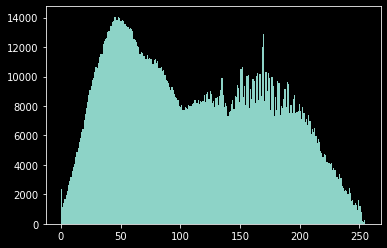

In [7]:
#图像均衡处理 像素值直方图 从 ：瘦高 -> 矮胖
'''
计算累积概率 比如计算 128的累积概率就是 [0:128]像素的个数 / 总像素数
映射后的值 = int(累积概率 * (取值范围的宽度))
'''
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

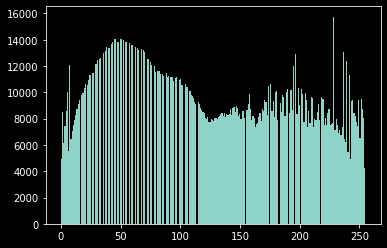

In [13]:
#均衡化处理后的图片，均衡化容易丢失细节。最好是分块做均衡化
equ_img = cv2.equalizeHist(img)
plt.hist(equ_img.ravel(),256)
plt.show()
#opencv有自适应均衡化方法，非常好用 cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

"\n#得到灰度图的表示形式\nmagnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #中心是低频，外面是高频\n\nplt.subplot(121),plt.imshow(img,cmap='gray')\nplt.title('Input Image'),plt.xticks([]),plt.yticks([])\nplt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')\nplt.show()\n"

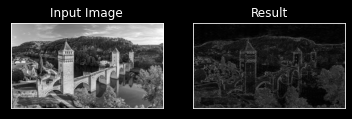

In [4]:
#傅里叶变换滤波器
#傅里叶变换后得到的高频信息:变化剧烈地灰度分量，比如边界
#傅里叶变换后得到的低频信息:比如色块儿
#低通滤波器:使图像模糊
#高通滤波器:使图像细节增强

#opencv中主要是 cv2.dft() 和 cv2.idft() ，输入图像一定要先变成 np.float32形式
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2) #中心点坐标

#----------------低通滤波----------------
'''
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1
'''

#----------------高通滤波----------------
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0



#IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap='gray')
plt.title('Result'),plt.xticks([]),plt.yticks([])



'''
#得到灰度图的表示形式
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #中心是低频，外面是高频

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()
'''


In [7]:
#harris角点检测
#cv2.cornerHarries
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,2,3,0.04)
img[dst>0.1*dst.max()] = [0,0,255]#BGR通道
imshow(img)

In [2]:
#SIFT（Scale Invariant Feature Transform）算法
#对于人眼来说，无论物体大小人眼都可以分辨出来。
#要想让机器能够对物体在不同尺度有一个统一的认知，就需要考虑图像在不同尺度下存在的特点。
#步骤： 高斯模糊(改变高斯滤波的σ) -> 多分辨率金字塔(高斯差分金字塔DOG)
#下面的代码和只能在cv2版本3.4.3以下运行
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\bridge.jpg')
#opencv3.4.3之后的版本有专利保护

#得到特征点
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img = cv2.drawKeypoints(gray,kp,img)
imshow(img)


In [3]:
img = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\5.jpg')
#得到特征点
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img = cv2.drawKeypoints(gray,kp,img)
imshow(img)
#计算特征向量化
kp,des = sift.compute(gray,kp)


In [4]:
#特征匹配

#方法1:蛮力匹配 Brute-Force 1to1
img1 = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\5.jpg')
img2 = imread('C:\\Users\\吴坷\\PycharmProjects\\deeplearning_pupil\\pictures\\4.jpg')
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(gray1,None)
kp2,des2 = sift.detectAndCompute(gray2,None)

#CrossCheck 表示两个特征点要蛮力匹配
bf = cv2.BFMatcher(crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches,key=lambda x:x.distance)

#img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=2)
#imshow(img3)



#方法2：k对最佳匹配 1to多   ransac算法可以抓住大多点的总体情况，不会受到少量异常点的影响
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
imshow(img3)

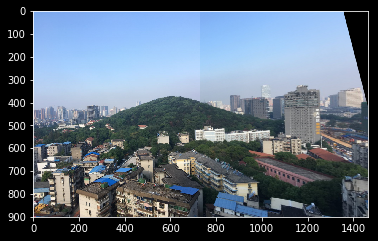

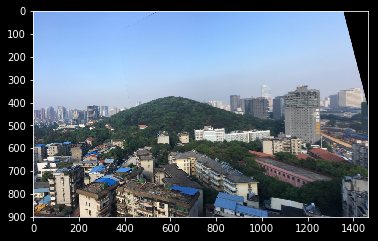

simple stich cost 0.820075

total cost 15.315261


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
MIN = 10
starttime=time.time()
img1 = cv2.imread('1.jpg') #query
img2 = cv2.imread('2.jpg') #train

img1 = imread('C:/Users/吴坷/PycharmProjects/deeplearning_pupil/pictures/cat1.png')
img2 = imread('C:/Users/吴坷/PycharmProjects/deeplearning_pupil/pictures/cat2.png')

#img1gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
surf=cv2.xfeatures2d.SURF_create(10000,nOctaves=4,extended=False,upright=True)
#surf=cv2.xfeatures2d.SIFT_create()#可以改为SIFT
kp1,descrip1=surf.detectAndCompute(img1,None)
kp2,descrip2=surf.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
indexParams = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
searchParams = dict(checks=50)

flann=cv2.FlannBasedMatcher(indexParams,searchParams)
match=flann.knnMatch(descrip1,descrip2,k=2)


good=[]
for i,(m,n) in enumerate(match):
        if(m.distance<0.75*n.distance):
                good.append(m)

if len(good)>MIN:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        ano_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
        M,mask=cv2.findHomography(src_pts,ano_pts,cv2.RANSAC,5.0)
        warpImg = cv2.warpPerspective(img2, np.linalg.inv(M), (img1.shape[1]+img2.shape[1], img2.shape[0]))
        direct=warpImg.copy()
        direct[0:img1.shape[0], 0:img1.shape[1]] =img1
        simple=time.time()

#cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
#cv2.imshow("Result",warpImg)
        rows,cols=img1.shape[:2]
        
        for col in range(0,cols):
            if img1[:, col].any() and warpImg[:, col].any():#开始重叠的最左端
                left = col
                break
        for col in range(cols-1, 0, -1):
            if img1[:, col].any() and warpImg[:, col].any():#重叠的最右一列
                right = col
                break

        res = np.zeros([rows, cols, 3], np.uint8)
        for row in range(0, rows):
            for col in range(0, cols):
                if not img1[row, col].any():#如果没有原图，用旋转的填充
                    res[row, col] = warpImg[row, col]
                elif not warpImg[row, col].any():
                    res[row, col] = img1[row, col]
                else:
                    srcImgLen = float(abs(col - left))
                    testImgLen = float(abs(col - right))
                    alpha = srcImgLen / (srcImgLen + testImgLen)
                    res[row, col] = np.clip(img1[row, col] * (1-alpha) + warpImg[row, col] * alpha, 0, 255)

        warpImg[0:img1.shape[0], 0:img1.shape[1]]=res
        final=time.time()
        img3=cv2.cvtColor(direct,cv2.COLOR_BGR2RGB)
        plt.imshow(img3,),plt.show()
        img4=cv2.cvtColor(warpImg,cv2.COLOR_BGR2RGB)
        plt.imshow(img4,),plt.show()
        print("simple stich cost %f"%(simple-starttime))
        print("\ntotal cost %f"%(final-starttime))
else:
        print("not enough matches!")

